# K-Nearest Neighbor Regression - Body Fat % Example

In K-Nearest Neighbor Regression, datapoints are provided to the model during training - and these data points are mapped locationally. When a new datapoint is provided to the model for prediction, the model determines a pre-specified number (k) of existing datapoints closest (per Euclidean distance) to the prediction point and assigns the average value of those neighbors to the prediction point.

The following is an example in which scikit-learn's KNeighborsRegressor is visually explored. The dataset is health data on 252 patients. Density represents the weight of the individual taken underwater is almost perfectly negatively correlated (Pearson = -0.99) to Body Fat %. Outside of Age and Weight, the remaining features are measurements in cm of the corresponding body parts. First we'll take a look at the special case where we use Density as our only feature to predict BodyFat %. Then we'll look at Abdomen (Pearson = 0.81) as our only feature to predict BodyFat %. Then we'll look at using ALL of our features to predict BodyFat %, and finally, we'll try to select the optimal features - excluding Density because that's basically cheating - to predict BodyFat %.

## Import Modules

In [1]:
#Import Modules
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import numpy as np
import mglearn

## Upload Data from 'bodyfast.csv' File and Scale the Data Using Standard Scaler
Data definitely needs to be scaled when using k-nearest neighbors. See the [this post for more information on scaling data](https://hanleye29.github.io/portfolio/datacleaning/2021/06/28/Heart_Attack.html).

In [2]:
#Enter the data into dataframes
X_full = pd.read_csv('bodyfat.csv')
y = X_full['BodyFat']
X = X_full.drop(columns = ['BodyFat'])

#Scale X
scaler = StandardScaler()
labels = X.columns
X = pd.DataFrame(scaler.fit_transform(X), columns = labels)

X.head()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,0.801647,-1.740073,-0.841246,-0.656205,-0.738665,-0.918048,-0.683533,-0.755929,-0.077479,-0.536131,-0.710826,-0.090676,-0.626718,-1.212541
1,1.565061,-1.819583,-0.193462,0.574790,0.209365,-0.858621,-0.887963,-0.168502,-0.134736,-0.536131,0.175947,-0.588143,0.117079,-0.031943
2,-0.746240,-1.819583,-0.849769,-1.066536,-1.645475,-0.597144,-0.432643,-0.098570,0.037035,0.128592,0.530656,-1.151940,-1.717621,-1.749177
3,1.028039,-1.501543,0.198617,0.574790,-0.244041,0.115976,-0.572026,0.181157,0.132464,-0.536131,-0.178762,0.041982,0.365012,-0.031943
4,-1.135844,-1.660563,0.181570,0.301235,-1.480601,-0.418864,0.691719,0.279061,0.724121,1.499585,0.530656,-0.024347,-0.477959,-0.568578


In [3]:
X.describe()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02
mean,5.677117e-15,1.920862e-16,2.757935e-16,1.475396e-15,-7.586524e-16,-3.524518e-17,3.665498e-16,8.132824e-16,-8.426626e-16,8.564578e-16,7.361836e-16,-8.304644e-17,-2.977336e-15,2.854859e-16
std,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00
min,-3.189163e+00,-1.819583e+00,-2.060102e+00,-1.111966e+01,-2.840817e+00,-2.558224e+00,-2.151708e+00,-2.084632e+00,-2.329591e+00,-2.322577e+00,-2.366135e+00,-2.478519e+00,-3.800254e+00,-2.607794e+00
25%,-7.462399e-01,-7.263189e-01,-6.793000e-01,-5.194276e-01,-6.562274e-01,-7.694810e-01,-7.416097e-01,-6.160653e-01,-6.500498e-01,-6.711535e-01,-6.517075e-01,-6.876368e-01,-6.763048e-01,-6.759055e-01
50%,-3.547554e-02,-1.498703e-01,-8.265733e-02,-4.070749e-02,3.271323e-03,-1.395583e-01,-1.492291e-01,-8.458411e-02,-7.747885e-02,-3.758855e-02,-1.787621e-01,-7.409368e-02,1.790624e-02,7.538454e-02
75%,7.805873e-01,7.247413e-01,6.162669e-01,5.747897e-01,5.906373e-01,5.408770e-01,6.289966e-01,5.063391e-01,5.618921e-01,5.544311e-01,5.306560e-01,6.803985e-01,6.625308e-01,6.120203e-01
max,2.807582e+00,2.871515e+00,6.280963e+00,2.079339e+00,5.444135e+00,4.204531e+00,5.161290e+00,6.684808e+00,5.323774e+00,4.366207e+00,6.383355e+00,4.220708e+00,3.092269e+00,3.402526e+00


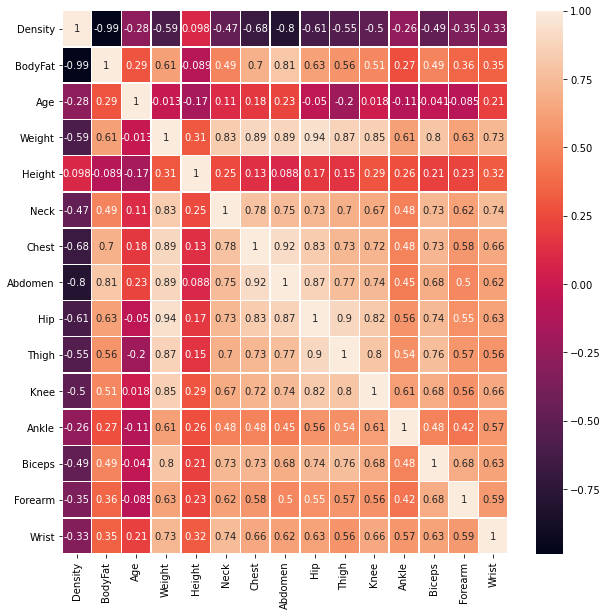

In [4]:
#Explore correlations in the dataset
corr = X_full.corr()
fig, ax = plt.subplots(figsize=(10,10))     
sns.heatmap(corr, annot = True,linewidths=.5, ax=ax)
plt.show()

### Our data is nice and standardized (enough). Let's make a couple of functions to take a look at things a little easier. 
One function makeRegressor accepts a dataframe (df), a number of neighbors to be passed to the model (k), and whether the function weighs (w) the neighbors uniformly ('uniform') or weighs points by the inverse of their distance ('distance), then the function generates a score (coefficient of determination - R-squared) for the model built around that dataframe. The other function graphScoreVsK accepts a dataframe df, and that same weight function from earlier, and then graphs scores for that dataframe over a span of 50 values of k.

In [5]:
def makeRegressor(df,k,w):
    
    #Split data into training and testing data.
    X_train,X_test,y_train,y_test = train_test_split(df,y, random_state = 42)
    
    #Instantiate model
    model = KNeighborsRegressor(n_neighbors = k, weights = w)
    #Fit model to training data
    model.fit(X_train,y_train)
    #Generate Predictions
    preds = model.predict(X_test)
    
    #Return test score
    return model.score(X_test,y_test)

In [6]:
def graphScoreVsK(df,w):
    ks = [x for x in list(range(1,50))]
    scores = [makeRegressor(df,x,w) for x in ks]
    max_score = max(scores)
    best_k = scores.index(max_score) + 1
    plt.scatter(ks,scores)
    plt.xlabel("Number of Neighbors (k)")
    plt.ylabel("Coefficient of Determination (R^2)")
    plt.show()
    print('K: ' + str(best_k) + '; Max Score: ' + str(round(max_score,2)))
    return

## So, what does it look like when we build our model only around Density?

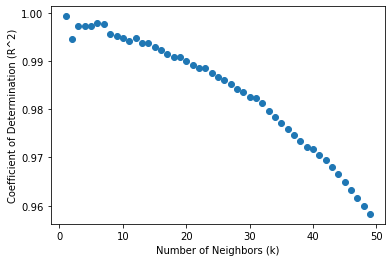

K: 1; Max Score: 1.0


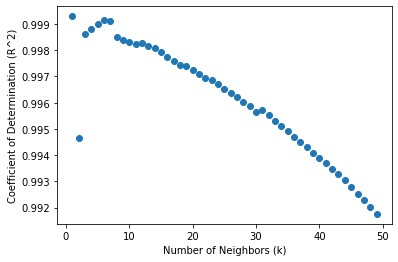

K: 1; Max Score: 1.0


In [7]:
graphScoreVsK(pd.DataFrame(X['Density']),'uniform')
graphScoreVsK(pd.DataFrame(X['Density']),'distance')

## Well there you have it - when a feature is perfectly correlated (or negatively correlated) with it's target - it will be able to perfectly predict the target when K = 1, or when it only considers its closest neighbor. The more neighbors considered, the further its predicted value strays from the perfectly correlated value.

## In the graphs below, we can see how the KNN Regressor is trained to the blue triangles. Red Triangles represent Test Data, and the blue line shows the predicted values based on the KNN Regressor Function. When K = 1, the model predicts perfectly - see how the tails on either side of the graph track perfectly to the blue training triangles. Once we set K = 9, the model predicts the value of BodyFat% based off the average value of its 9 closest neighbors. As you can see, the model predictions no longer track perfectly to the training data, but return averaged values of the 9 closest neighbors. At 17 neighbors we see that we're no longer predicting with a test score of 1.0 - averaging the nearest 17 neighbors is starting to significantly shift our values.

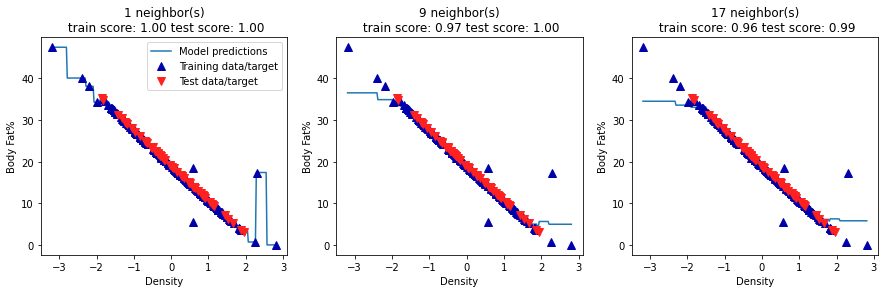

In [8]:
X2 = X['Density']
y2 = X_full['BodyFat']
X_train,X_test,y_train,y_test = train_test_split(X2,y2, random_state = 42)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(X2.min(), X2.max(), len(X2)).reshape(-1,1)
for n_neighbors, ax in zip([1, 9, 17], axes):
    # make predictions using 1, 9, or 49 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors, weights = 'uniform')
    reg.fit(X_train.to_numpy().reshape(-1,1), y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train.to_numpy().reshape(-1,1), y_train),reg.score(X_test.to_numpy().reshape(-1,1), y_test)))
    ax.set_xlabel("Density")
    ax.set_ylabel("Body Fat%")
                 
axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")
plt.show()

## Of course - this is only the case when we have a perfectly correlated feature like Density. What happens when we use another feature like Abdomen that had a respectable correlation value of 0.81?

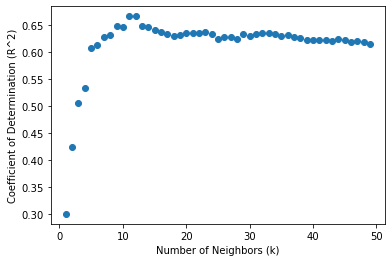

K: 12; Max Score: 0.67


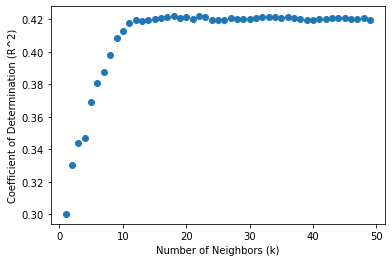

K: 18; Max Score: 0.42


In [9]:
graphScoreVsK(pd.DataFrame(X['Abdomen']),'uniform')
graphScoreVsK(pd.DataFrame(X['Abdomen']),'distance')

## In the case where Abdomen is our only predictive feature, our optimum parameter K = 12, which gives us an R-squared value of 0.67. Weighing by distance seems to be significantly reducing the predictive power of the model.

## If we look again at the graphs below (they're significantly zoomed in), we can see a bit clearer how the model is predicting values. When K = 1, the model is predicting BodyFat% based only on the closest neighbor. The predicted values are fluctuating wildly between the training data points (the nearest neighbor) and missing the test scores accordingly. At K = 3, the predicted values are still fluctuating, but now they are fluctuating between the average of the three nearest neighbors. At our optimum parameter K = 12, the model is predicting the average value of the nearest 12 neighbors which is bringing the prediction the closest to the actual test values.

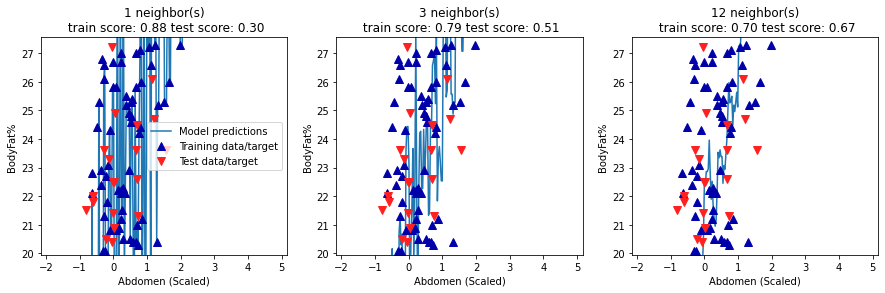

In [10]:
X2 = X['Abdomen']
y2 = X_full['BodyFat']
X_train,X_test,y_train,y_test = train_test_split(X2,y2, random_state = 42)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(X2.min(), X2.max(), len(X2)).reshape(-1,1)
for n_neighbors, ax in zip([1, 3, 12], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors, weights = 'uniform')
    reg.fit(X_train.to_numpy().reshape(-1,1), y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train.to_numpy().reshape(-1,1), y_train),reg.score(X_test.to_numpy().reshape(-1,1), y_test)))
    ax.set_xlabel("Abdomen (Scaled)")
    ax.set_ylabel("BodyFat%")
    ax.margins(x=0, y=-0.42) 
                 
axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")
plt.show()

## Now that we've visualized exactly how our KNN Regressor is working with one feature predicting BodyFat %, let's see what happens when we use ALL of our features to predict Body Fat %. Because there are 14 features - and it is quite difficult to visualize a 14 dimensional space - we'll have to settle for visualizing our R-squared value at different values of K.

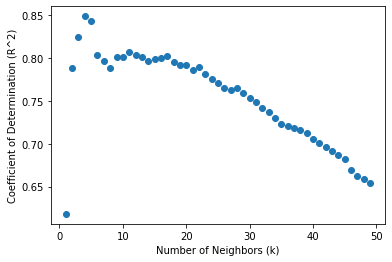

K: 4; Max Score: 0.85


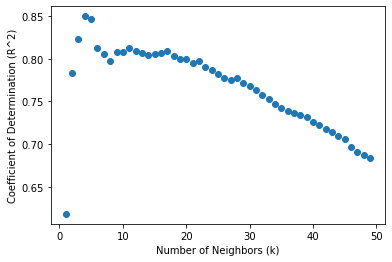

K: 4; Max Score: 0.85


In [11]:
graphScoreVsK(X,'uniform')
graphScoreVsK(X,'distance')

## In this case - it seems that more is less. We still have Density as one of the features we're using to predict Body Fat %, but we're getting a significantly worse R-squared score (0.85) than when we just used Density as the predicting feature (1.0). Which makes sense! By adding less perfectly correlated features, we're inherently increasing the distance (in multi-dimensional space now) between the. Also - just by adding more features, on average we've increased the distance between neighbors. (See [Curse of Dimensionality](https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote02_kNN.html))

## This is all good and fun and educational, but let's go ahead and see if we can make the best model possible without Density as a feature - since it is basically just cheating. Well, as we were alluding to above - KNN works best with low dimensionality data - so lets see if we can't cut out some of the slag with some good old PCA (Principal Component Analysis). We'll compare the performance of the model without Density to the performance of a model without Density that also has an optimized PCA performed on it.

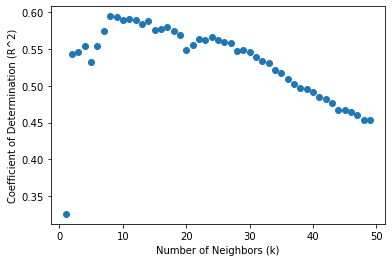

K: 8; Max Score: 0.59


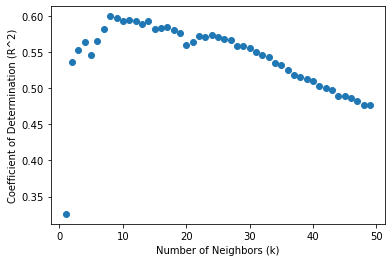

K: 8; Max Score: 0.6


In [12]:
graphScoreVsK(X.drop(columns = 'Density'),'uniform')
graphScoreVsK(X.drop(columns = 'Density'),'distance')

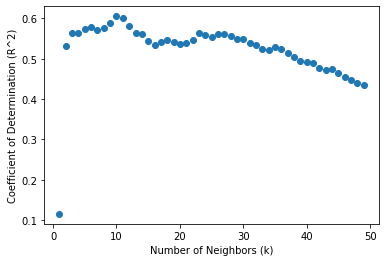

K: 10; Max Score: 0.61


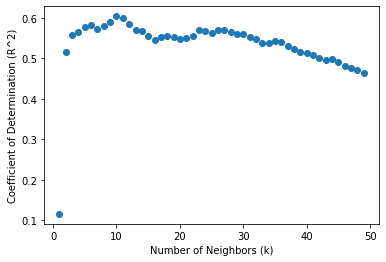

K: 10; Max Score: 0.6


In [13]:
pca = PCA(n_components = 8)
X_PCA = pca.fit_transform(X.drop(columns = ['Density']))
X_PCA = pd.DataFrame(X_PCA)

graphScoreVsK(X_PCA,'uniform')
graphScoreVsK(X_PCA,'distance')